## ANALYSIS 3

In [114]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [115]:
reviews=pd.read_csv("Other Files\\Reviews_Yelp.csv")
data=pd.read_csv("Other Files\\YelpData.csv")

In [3]:
reviews.head()

,id,rating,time_created,text
0,80-proof-sydney,4,2015-04-15 03:37:53,Right under my nose! like literally. My collea...
1,80-proof-sydney,5,2016-04-13 02:45:30,Great food! Good portions at a reasonable pri...
2,80-proof-sydney,4,2013-06-19 17:15:22,Very chill and cozy place to hang out (Can't c...
3,alpha-restaurant-sydney,5,2016-07-08 19:34:56,If you're into something fancy this place is y...
4,alpha-restaurant-sydney,4,2016-10-22 05:36:00,well if u want to take someone special on date...


In [4]:
review_city=pd.merge(reviews,data,how='left',on="id")

In [5]:
review_city=review_city[['id','rating_x','time_created','text','city']]

In [6]:
review_city_boston=review_city[review_city['city']=='Boston']

In [7]:
len(review_city_boston)

240

In [8]:
reviews_boston=review_city_boston

In [9]:
reviews_boston.columns

Index(['id', 'rating_x', 'time_created', 'text', 'city'], dtype='object')

In [11]:
reviews_boston=reviews_boston.reset_index()

In [14]:
pos_count = 0
neg_count = 0
reviews_boston["positivity"]=0.000
reviews_boston["negativity"]=0.000
#print(df)
for i in range(0,len(reviews_boston)):
    blob = TextBlob(reviews_boston["text"][i], analyzer=NaiveBayesAnalyzer())
    reviews_boston["positivity"][i]=blob.sentiment.p_pos*100
    reviews_boston["negativity"][i]=blob.sentiment.p_neg*100
    print(blob.sentiment)
    if blob.sentiment.classification == 'pos':
        pos_count+=blob.sentiment.p_pos
    if blob.sentiment.classification == 'neg':
        neg_count+=blob.sentiment.p_neg
    print(i)
pos_count=float(pos_count/len(reviews_boston))
neg_count=float(neg_count/len(reviews_boston))
print("Overall positivity score:"+str(pos_count))
print("Overall negativity score:"+str(neg_count))
#print(df["Type"][i])

C:\Users\Nimi\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Nimi\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Sentiment(classification='pos', p_pos=0.9911855827264499, p_neg=0.008814417273545457)
0
Sentiment(classification='neg', p_pos=0.3209625195740948, p_neg=0.6790374804259035)
1
Sentiment(classification='pos', p_pos=0.6941633596030242, p_neg=0.30583664039698016)
2
Sentiment(classification='pos', p_pos=0.9785712675389453, p_neg=0.021428732461053795)
3
Sentiment(classification='pos', p_pos=0.8830735524760603, p_neg=0.11692644752394077)
4
Sentiment(classification='pos', p_pos=0.7191289437582211, p_neg=0.2808710562417791)
5
Sentiment(classification='pos', p_pos=0.9379685516310852, p_neg=0.0620314483689158)
6
Sentiment(classification='pos', p_pos=0.742937358886102, p_neg=0.25706264111389426)
7
Sentiment(classification='pos', p_pos=0.8427168489312703, p_neg=0.15728315106872642)
8
Sentiment(classification='pos', p_pos=0.7577888200624815, p_neg=0.24221117993752053)
9
Sentiment(classification='pos', p_pos=0.7475444273000809, p_neg=0.2524555726999206)
10
Sentiment(classification='pos', p_pos=0.82492

In [18]:
reviews_boston.to_csv('Other Files\\sentiment.csv',encoding='UTF-8',index=False)

In [19]:
reviews1 = pd.read_csv('Other Files\\sentiment.csv')

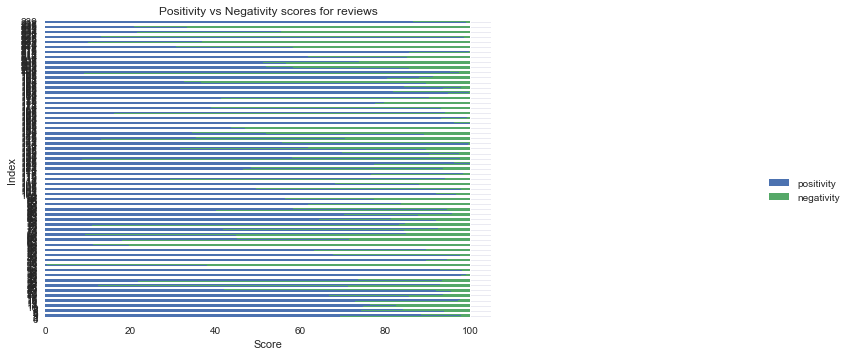

In [21]:
import seaborn
reviews3=reviews1[['positivity','negativity']]
ax=reviews3.plot(kind='barh', stacked=True,title = "Positivity vs Negativity scores for reviews",legend=True)
ax.legend(bbox_to_anchor=(1.8, 0.5))
ax.set_xlabel("Score")
ax.set_ylabel("Index")
#for i, v in enumerate(reviews3['positivity']):
 #   ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')

In [47]:
reviews.head()

,positivity,negativity
0,24.314830,75.685170
1,85.839924,14.160076
2,79.942673,20.057327
3,78.831975,21.168025
4,99.819236,0.180764


In [22]:
reviews1['Sentiment']= 0
reviews1['Sentiment'][reviews1['positivity'] > reviews1['negativity']]= 1
reviews1['Sentiment'][reviews1['negativity'] > reviews1['positivity']] = 0


C:\Users\Nimi\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Nimi\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [44]:
reviews2 = reviews1[0:1309].reset_index()

In [7]:
reviews2.tail()

NameError: name 'reviews2' is not defined

In [71]:
a= reviews2.groupby(['id','rating'], sort= True )

In [72]:
a.head()

,id,rating,time_created,text,positivity,negativity,Sentiment
0,80-proof-sydney,4,2015-04-15 03:37:53,Right under my nose! like literally. My collea...,24.314830,75.685170,0
1,80-proof-sydney,5,2016-04-13 02:45:30,Great food! Good portions at a reasonable pri...,85.839924,14.160076,1
2,80-proof-sydney,4,2013-06-19 17:15:22,Very chill and cozy place to hang out (Can't c...,79.942673,20.057327,1
3,alpha-restaurant-sydney,5,2016-07-08 19:34:56,If you're into something fancy this place is y...,78.831975,21.168025,1
4,alpha-restaurant-sydney,4,2016-10-22 05:36:00,well if u want to take someone special on date...,99.819236,0.180764,1
5,alpha-restaurant-sydney,5,2015-09-13 18:28:05,Have been here a couple of times now and every...,93.403016,6.596984,1
6,ambar-sydney,4,2016-04-14 16:25:38,Almost didn't find this place got stuck in the...,98.383920,1.616080,1
7,ambar-sydney,3,2014-08-06 17:07:38,"This is a great ""catching up with old work col...",36.688401,63.311599,0
8,ambar-sydney,4,2015-07-07 02:03:02,Another good place for afterwork drinks. Their...,57.781524,42.218476,1
9,aria-restaurant-sydney-sydney,5,2017-04-15 01:28:56,Aria was everything my husband and I hoped for...,97.865310,2.134690,1


In [75]:
datafr=pd.read_csv(r"Other Files\YelpData.csv",encoding='utf-8')
countryliving='US'

In [98]:
datafr.head()

,id,name,review_count,price,is_closed,latitude,longitude,city,state,zip_code,country,rating,phone,term,image
0,80-proof-sydney,80 Proof,5,NaN,False,-33.876675,151.206010,Sydney,NSW,2000,AU,4.0,6.129263e+10,restaurants,https://s3-media1.fl.yelpcdn.com/bphoto/l8YhtI...
1,alpha-restaurant-sydney,Alpha Restaurant,26,$$$,False,-33.875243,151.209271,Sydney,NSW,2000,AU,4.0,6.129098e+10,restaurants,https://s3-media4.fl.yelpcdn.com/bphoto/amSYJH...
2,ambar-sydney,Ambar,5,$,False,-33.868154,151.209339,Sydney,NSW,2000,AU,4.0,6.129223e+10,restaurants,https://s3-media3.fl.yelpcdn.com/bphoto/k5KyZo...
3,aria-restaurant-sydney-sydney,ARIA Restaurant Sydney,57,$$$$,False,-33.859173,151.213177,Sydney,NSW,2000,AU,3.5,6.129252e+10,restaurants,https://s3-media2.fl.yelpcdn.com/bphoto/hxspCd...
4,bambini-trust-cafe-and-wine-room-sydney,Bambini Trust Cafe & Wine Room,13,$$$,False,-33.872391,151.209625,Sydney,NSW,2000,AU,4.0,6.129284e+10,restaurants,https://s3-media2.fl.yelpcdn.com/bphoto/31fB5o...


In [104]:
datafr1=datafr[['id','city','state','country','latitude','longitude']]

In [105]:
datafr1.head()

,id,city,state,country,latitude,longitude
0,80-proof-sydney,Sydney,NSW,AU,-33.876675,151.206010
1,alpha-restaurant-sydney,Sydney,NSW,AU,-33.875243,151.209271
2,ambar-sydney,Sydney,NSW,AU,-33.868154,151.209339
3,aria-restaurant-sydney-sydney,Sydney,NSW,AU,-33.859173,151.213177
4,bambini-trust-cafe-and-wine-room-sydney,Sydney,NSW,AU,-33.872391,151.209625


In [106]:
new_review = pd.merge(datafr1, reviews2,  how='inner', left_on=['id'], right_on = ['id'])

In [107]:
new_review.head()

,id,city,state,country,latitude,longitude,rating,time_created,text,positivity,negativity,Sentiment
0,80-proof-sydney,Sydney,NSW,AU,-33.876675,151.206010,4,2015-04-15 03:37:53,Right under my nose! like literally. My collea...,24.314830,75.685170,0
1,80-proof-sydney,Sydney,NSW,AU,-33.876675,151.206010,5,2016-04-13 02:45:30,Great food! Good portions at a reasonable pri...,85.839924,14.160076,1
2,80-proof-sydney,Sydney,NSW,AU,-33.876675,151.206010,4,2013-06-19 17:15:22,Very chill and cozy place to hang out (Can't c...,79.942673,20.057327,1
3,alpha-restaurant-sydney,Sydney,NSW,AU,-33.875243,151.209271,5,2016-07-08 19:34:56,If you're into something fancy this place is y...,78.831975,21.168025,1
4,alpha-restaurant-sydney,Sydney,NSW,AU,-33.875243,151.209271,4,2016-10-22 05:36:00,well if u want to take someone special on date...,99.819236,0.180764,1


In [115]:
new_review_NSW=new_review[new_review['state']=='NSW']
new_review_NSW['longitude'].max()

151.256134

In [ ]:
-33.906 -33.835
151.185  151.256


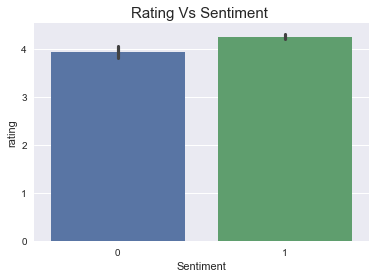

In [74]:
import matplotlib
import matplotlib.pyplot as plt
#print(cuisine4)
%matplotlib inline
import seaborn as sns
#ax=sns.factorplot("title", "count",
#                               data=cuisine4, kind="bar",orient="h",
#                               size=10, palette="muted", legend=False)
#plt.savefig(r'Output Files\Analysis 1\Plot\Restaurant-Per-Capita.jpg')
ax = sns.barplot(x="Sentiment", y="rating", orient= "v", data=reviews2)
#print('CSV Files and Plots saved successfully')
ax.set(xlabel='Sentiment', ylabel='rating')
plt.title("Rating Vs Sentiment ",fontsize=15)
#for index, row in cuisine4.iterrows():
 #   ax.text(row.count,row.count, row.count, color='black', ha="center")
plt.show()

In [25]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import gmplot

from mpl_toolkits.basemap import Basemap

In [30]:
datafr1=data[['id','city','state','country','latitude','longitude']]

In [31]:
reviews12 = pd.merge(reviews1, datafr1,  how='left', left_on=['id'], right_on = ['id'])

In [44]:
reviews12.head()

,index,id,rating_x,time_created,text,city_x,positivity,negativity,Sentiment,city_y,state,country,latitude,longitude
0,4980,75-chestnut-boston,5,2017-04-10 07:38:14,This is an adorable spot on beacon hill quiet ...,Boston,99.118558,0.881442,1,Boston,MA,US,42.356934,-71.070984
1,4981,75-chestnut-boston,4,2017-04-01 08:56:30,This is exactly what I needed my first night i...,Boston,32.096252,67.903748,0,Boston,MA,US,42.356934,-71.070984
2,4982,75-chestnut-boston,2,2017-03-27 03:33:26,Came for Sunday Brunch. We were seated at a hi...,Boston,69.416336,30.583664,1,Boston,MA,US,42.356934,-71.070984
3,4983,al-dente-restaurant-boston,5,2017-04-13 08:56:17,While staying in Little Italy during a confere...,Boston,97.857127,2.142873,1,Boston,MA,US,42.364220,-71.055360
4,4984,al-dente-restaurant-boston,5,2017-04-01 12:52:14,I'll be honest I did not know what to expect w...,Boston,88.307355,11.692645,1,Boston,MA,US,42.364220,-71.055360


In [51]:
df=pd.DataFrame()
df['latitude']=reviews12['latitude'].ffill()
df['longitude']=reviews12['longitude'].ffill()
latitudes=df['latitude']
longitudes=df['longitude']
latitudes=latitudes.tolist()
longitudes=longitudes.tolist()

In [36]:
reviews12_latitude = reviews12.latitude
reviews12_longitude = reviews12.longitude

reviews12_lat = reviews12_latitude.tolist()
reviews12_lng = reviews12_longitude.toli


In [38]:
gmap = gmplot.GoogleMapPlotter(reviews12_lat[0], reviews12_lng[0], 14)

gmap.scatter(reviews12_lat, reviews12_lng, '#3F3067', size=20, marker=False)
#gmap.scatter(hotels_lat, hotels_lng, '#BB1F5C', size=20, marker=False)

gmap.draw(r'mymap.html')

In [74]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

In [112]:
# let's first define a helper function to plot the map of Bay Area in US. 

def plot_map(service = 'ESRI_Imagery_World_2D', epsg = 4269, xpixels = 5000):
    # note, you need change the epsg for different region, 
    #US is 4269, and you can google the region you want
    plt.figure(figsize = (8, 8))
    #m = Basemap(projection='mill',llcrnrlon=-123. ,llcrnrlat=37,
      #  urcrnrlon=-121 ,urcrnrlat=39, resolution = 'l', epsg = epsg)
    m=Basemap(projection='mill', llcrnrlon=-71.1334228515625, llcrnrlat=42.322506782299797, urcrnrlon=-71.035987943405004, urcrnrlat=42.376663461327603, resolution='l',epsg=epsg)
    x,y = themap(reviews12.longitude.values, reviews12.latitude.values)
    m.scatter(x,y, color = '#3F3067', alpha=0.8, label = 'Restaurants')
    
    # xpixels controls the pixels in x direction, and if you leave ypixels
    # None, it will choose ypixels based on the aspect ratio
    m.arcgisimage(service=service, xpixels = xpixels, verbose= False)
    legend = plt.legend(frameon = True, fontsize=10, loc='upper left', markerscale=4)
    plt.title("Boston Map showing the restaurants distribution in the city")
    plt.show()

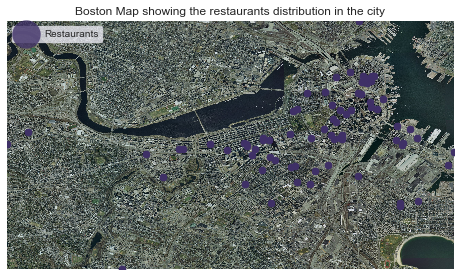

In [113]:
plot_map(service = 'ESRI_Imagery_World_2D', epsg = 4269)